In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('tweet_emotions.csv')
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
content = data['content']
content

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

# Lowering the data

In [4]:
content = content.str.lower()
content

0        @tiffanylue i know  i was listenin to bad habi...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4        @dannycastillo we want to trade with someone w...
                               ...                        
39995                                     @johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998    @niariley wassup beautiful!!! follow me!!  pee...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

# Removing User IDs

In [5]:
for i in range(len(content)):
    content[i] = re.sub('@\S+', '', content[i])
content

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [6]:
content[0]

' i know  i was listenin to bad habit earlier and i started freakin at his part =['

# Removing Links

In [7]:
for i in range(len(content)):
    content[i] = re.sub('http\S+', '', content[i])
content

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [8]:
content[0]

' i know  i was listenin to bad habit earlier and i started freakin at his part =['

# Tokenization

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
for i in range(len(content)):
    content[i] = word_tokenize(content[i])
content

0        [i, know, i, was, listenin, to, bad, habit, ea...
1        [layin, n, bed, with, a, headache, ughhhh, ......
2            [funeral, ceremony, ..., gloomy, friday, ...]
3           [wants, to, hang, out, with, friends, soon, !]
4        [we, want, to, trade, with, someone, who, has,...
                               ...                        
39995                                                   []
39996                 [happy, mothers, day, all, my, love]
39997    [happy, mother, 's, day, to, all, the, mommies...
39998    [wassup, beautiful, !, !, !, follow, me, !, !,...
39999    [bullet, train, from, tokyo, the, gf, and, i, ...
Name: content, Length: 40000, dtype: object

In [11]:
content[0]

['i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part',
 '=',
 '[']

In [12]:
content[1]

['layin',
 'n',
 'bed',
 'with',
 'a',
 'headache',
 'ughhhh',
 '...',
 'waitin',
 'on',
 'your',
 'call',
 '...']

# Removing Punctuations and Stopwords

In [13]:
for i in range(len(content)):
    content[i] = " ".join(word for word in content[i] if word not in string.punctuation)

In [14]:
content[1]

'layin n bed with a headache ughhhh ... waitin on your call ...'

In [15]:
for i in range(len(content)):
    content[i] = "".join(word for word in content[i] if word not in string.punctuation)

In [16]:
content[1]

'layin n bed with a headache ughhhh  waitin on your call '

In [17]:
for i in range(len(content)):
    content[i] = " ".join(content[i].split())

In [18]:
content[1]

'layin n bed with a headache ughhhh waitin on your call'

for i in range(len(content)):
    content[i] = word_tokenize(content[i])
content

content[1]

In [19]:
from nltk.corpus import stopwords

In [20]:
con = content[0]
con

'i know i was listenin to bad habit earlier and i started freakin at his part'

In [21]:
for i in range(len(content)):
    content[i] = " ".join(word for word in content[i].split() if word not in set(stopwords.words('english')))

## Use only when tokenizing is done after removing punctuations
for i in range(len(content)):
    content[i] = [word for word in content[i] if word not in set(stopwords.words('english'))]

In [23]:
content

0        know listenin bad habit earlier started freaki...
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39995                                                     
39996                               happy mothers day love
39997    happy mother day mommies woman man long momma ...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 40000, dtype: object

content[0]

content[1]

# Lemmatization

In [24]:
import spacy

In [25]:
nlp = spacy.load("en_core_web_sm")

In [26]:
content_2 = []

In [27]:
content = pd.DataFrame(content)
content

,content
0,know listenin bad habit earlier started freaki...
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
3,wants hang friends soon
4,want trade someone houston tickets one
...,...
39995,
39996,happy mothers day love
39997,happy mother day mommies woman man long momma ...
39998,wassup beautiful follow peep new hit singles w...


for i in range(len(content.content)):
    content.content[i] = " ".join(word for word in content.content[i])
content

In [28]:
for doc in nlp.pipe(content['content']):
    content_2.append(" ".join(token.lemma_ for token in doc))

In [29]:
content.content[0]

'know listenin bad habit earlier started freakin part'

In [30]:
content_2[0]

'know listenin bad habit early start freakin part'

In [31]:
content['text'] = pd.Series(content_2).iloc[:]

In [32]:
content = content.drop(['content'], axis = 1)
content

,text
0,know listenin bad habit early start freakin part
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
3,want hang friend soon
4,want trade someone houston ticket one
...,...
39995,
39996,happy mother day love
39997,happy mother day mommy woman man long momma so...
39998,wassup beautiful follow peep new hit single ww...


In [33]:
content = content.iloc[:, 0]
type(content)

pandas.core.series.Series

In [34]:
content

0         know listenin bad habit early start freakin part
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39995                                                     
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visit japan since thursd...
Name: text, Length: 40000, dtype: object

for i in range(len(content)):
        content[i] = content[i].split()
content

for i in range(len(content)):
    content[i] = " ".join(word for word in content[i])
content

# Enumerating Target Variables

In [211]:
labels = data['sentiment']
labels

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [212]:
classes = set(labels)
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [213]:
print(classes_to_index)
print(index_to_classes)

{'neutral': 0, 'empty': 1, 'sadness': 2, 'anger': 3, 'worry': 4, 'surprise': 5, 'boredom': 6, 'fun': 7, 'relief': 8, 'love': 9, 'hate': 10, 'happiness': 11, 'enthusiasm': 12}
{0: 'neutral', 1: 'empty', 2: 'sadness', 3: 'anger', 4: 'worry', 5: 'surprise', 6: 'boredom', 7: 'fun', 8: 'relief', 9: 'love', 10: 'hate', 11: 'happiness', 12: 'enthusiasm'}


In [214]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [215]:
y = names_to_ids(labels)
y

array([ 1,  2,  2, ...,  9, 11,  9])

In [216]:
y = pd.Series(y)
y

0         1
1         2
2         2
3        12
4         0
         ..
39995     0
39996     9
39997     9
39998    11
39999     9
Length: 40000, dtype: int32

In [35]:
x = content
x

0         know listenin bad habit early start freakin part
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39995                                                     
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visit japan since thursd...
Name: text, Length: 40000, dtype: object

In [36]:
y = data['sentiment']
y

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
39995       neutral
39996          love
39997          love
39998     happiness
39999          love
Name: sentiment, Length: 40000, dtype: object

In [37]:
cleaned_data = {"content": x, "emotion": y}

In [38]:
data_clean = pd.DataFrame(cleaned_data)
data_clean

,content,emotion
0,know listenin bad habit early start freakin part,empty
1,layin n bed headache ughhhh waitin call,sadness
2,funeral ceremony gloomy friday,sadness
3,want hang friend soon,enthusiasm
4,want trade someone houston ticket one,neutral
...,...,...
39995,,neutral
39996,happy mother day love,love
39997,happy mother day mommy woman man long momma so...,love
39998,wassup beautiful follow peep new hit single ww...,happiness


In [39]:
empty_lists_index = (data_clean[data_clean["content"].str.len() == 0]).index
len(empty_lists_index)

216

In [40]:
data_clean.drop(empty_lists_index, inplace = True)   # Should remove 171 + 45 = 216 rows and result 39784 rows only
data_clean

,content,emotion
0,know listenin bad habit early start freakin part,empty
1,layin n bed headache ughhhh waitin call,sadness
2,funeral ceremony gloomy friday,sadness
3,want hang friend soon,enthusiasm
4,want trade someone houston ticket one,neutral
...,...,...
39994,succesfully follow tayla,happiness
39996,happy mother day love,love
39997,happy mother day mommy woman man long momma so...,love
39998,wassup beautiful follow peep new hit single ww...,happiness


In [41]:
content_2 = data_clean['content'].iloc[:].copy()
content_2

0         know listenin bad habit early start freakin part
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                             succesfully follow tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visit japan since thursd...
Name: content, Length: 39784, dtype: object

In [42]:
cont = content_2[:].copy()
cont

0         know listenin bad habit early start freakin part
1                  layin n bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                             succesfully follow tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visit japan since thursd...
Name: content, Length: 39784, dtype: object

In [51]:
for i in range(len(con)):
    cont[i] = " ".join(word for word in cont[i].split() if len(str(word)) > 2)
cont

0         know listenin bad habit early start freakin part
1                    layin bed headache ughhhh waitin call
2                           funeral ceremony gloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                             succesfully follow tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long momma so...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visit japan since thursd...
Name: content, Length: 39784, dtype: object

In [285]:
for i in range(len(cont)):
    cont[i] = " ".join(word for word in cont[i].split() if word not in two_str)
cont

KeyError: 220

In [269]:
cont[39999] = " ".join(word for word in cont[39999].split() if word not in two_str)
cont[39999]

'bullet train tokyo visit japan since thursday vacationsightseee gaijin godzilla'

In [57]:
twos = " ".join(cont)
print(len(twos))
print(two)

1670754
ae tr 9 am go 4 gb to go go 6 am to go I m do na be bz oh oh oh bz n ya lt 8 I m go to 5 am 2 go oh I m 6 go to go I m I m go 10 pm 6 oh go 20 go na 2 mb go to go lt 3 oh go me 80 hi ur go go go do e er 9 vs 3x m da na go di fb n b 4 I m I m go be er er we do do go vp oh lt 3 ms ft do go 2 3 go go 30 do 30 go to 20 7 7 cr go to 68 I m mt 4 na aw u I m I m oh n go go em be 2 da da I m go mj pa go go oh lt 3 pm 8 am 9 am go go to go to bf da do w 4 re do go 1 12 do go 90 s na s do go I m I m do dm oh aw 0 oh do go mr fu k go I m a go 80 na ya to do s go to 1 to un sf um er go fb na um ya ur bk oh we 1 go v go 8 ce 22 go cd go we oh u go go mr do oh f ck oh sr go 2 2 ds go ng do na go be I m go cd cd lt gt go do ya do I m a dm go ms u do 34 tv oh pm go 10 u do 4 hi I m 2 go xx hi go go go 3 go I m s oh 3 lt 3 fc u go 2 b go nw s I m a 22 6 6 ms 26 oc I m re na 60 oh do go go q tv we pc go to go mr e1 2 go 1 2 7 he s rt ok 4 la oh I m a go to n e3 hi s na dr 30 15 mb na go 8 go go 

In [55]:
two = " ".join(word for word in two.split() if len(str(word)) <= 2)
print(len(two))
print(two)

67907
ae tr 9 am go 4 gb to go go 6 am to go I m do na be bz oh oh oh bz n ya lt 8 I m go to 5 am 2 go oh I m 6 go to go I m I m go 10 pm 6 oh go 20 go na 2 mb go to go lt 3 oh go me 80 hi ur go go go do e er 9 vs 3x m da na go di fb n b 4 I m I m go be er er we do do go vp oh lt 3 ms ft do go 2 3 go go 30 do 30 go to 20 7 7 cr go to 68 I m mt 4 na aw u I m I m oh n go go em be 2 da da I m go mj pa go go oh lt 3 pm 8 am 9 am go go to go to bf da do w 4 re do go 1 12 do go 90 s na s do go I m I m do dm oh aw 0 oh do go mr fu k go I m a go 80 na ya to do s go to 1 to un sf um er go fb na um ya ur bk oh we 1 go v go 8 ce 22 go cd go we oh u go go mr do oh f ck oh sr go 2 2 ds go ng do na go be I m go cd cd lt gt go do ya do I m a dm go ms u do 34 tv oh pm go 10 u do 4 hi I m 2 go xx hi go go go 3 go I m s oh 3 lt 3 fc u go 2 b go nw s I m a 22 6 6 ms 26 oc I m re na 60 oh do go go q tv we pc go to go mr e1 2 go 1 2 7 he s rt ok 4 la oh I m a go to n e3 hi s na dr 30 15 mb na go 8 go go to

In [ ]:
1670754 - 67907 

In [58]:
" ".join(word for word in twos.split() if word not in two.split())

KeyboardInterrupt: 

In [255]:
set1 = []
for i in range(len(content)):
    set1.append([word for word in content[i].split()])
#set1 =  set(set1)
set1 = np.array(set1)
set1 = (np.concatenate(set1, axis = 0))
print(set1.shape)
print("Total unique words in content: ", len(set(set1)))
print(set(set1))

(294849,)
Total unique words in content:  27820
{'vado', 'jumpy', 'whoot', 'awhh', 'wonderfull', 'softball', 'burst', 'polka', 'overflow', 'aaahh', 'yahh', 'wars', 'maine', 'sharkboy', 'loev', 'cannabis', 'coolio', 'sexualmaternal', '530am', 'morgie', 'civilisation', 'jealous', 'deceitful', 'correctly', 'txts', 'pillage', 'marta', 'autoreset', 'gcc', 'fm', 'macaroon', 'alix', 'loong', 'hivis', 'oreo', 'alrite', 'sellout', 'wishess', 'duff', 'diffuse', 'lazye', '40k', 'pkuer', 'blogtv', 'trivun', 'dim', 'lunching', 'swin', 'costume', 'xxxxxx', 'tai', 'kanji', 'tall', '430845', 'yummmmmyyyy', 'twittin', 'facebook', 'amma', 'mels', 'aquatard', 'straighene', 'holla', 'heh', 'louisiana', 'layne', 'uuugh', 't1', 'livebox', 'submarine', 'poss', 'aquino', 'granada', 'hype', 'ghosts', 'prechille', 'luau', 'pulaski', 'shawnee', 'dislocate', 'gratification', 'humane', 'backup', 'blend', 'menu', 'pt', 'errand', 'yikes', 'eeecontrol', 'times', 'offically', 'gareth', 'creature', 'til', 'thursday', '

In [257]:
num = 0
set1 = set(set1)
l = []
for i in set1:
    if (len(str(i)) <= 2):
        num += 1
    else:
        l.append(i)
print(len(l))
print(set1 - set(l))
two_str = set1 - set(l)
print(num)

27142
{'h1', 'vs', 'jt', '47', 'tx', 'fo', 'sc', 'ez', 'vm', 'ik', 'do', '55', 'ja', '61', '3u', 'lp', 'sk', 'mg', 'ov', 's1', '33', '58', '8', 'ur', 'na', 'sj', 'sr', 'ha', 'nz', 'mn', 'dt', 'hv', 'rb', '98', '3s', 'rr', '3d', 'xt', 'fm', 'e1', '1k', 'it', 'kk', 'xu', 'bs', 'ex', 'ru', 'eg', 'b3', 'yl', 'ug', 'pf', 'iv', 'ab', 'ht', 'te', 'dk', 'ds', 'r6', 'oo', 'yj', 'oj', 'jg', '8d', 'cf', 'll', 'v', 'ac', 'up', 'I', 'p1', 'm', '06', '79', 'bj', 'jv', '80', 'ke', 'en', 'tc', 'gl', 'bo', '8k', 'eh', 'he', 'hp', '39', 'ls', 'vp', '07', 'kd', 'r2', 'ef', 'au', 'wr', 't1', 'uk', 'sh', 'm3', 'x', 'rd', 'qs', 'a', 'ep', 'jx', 'pc', 'si', 'yn', 'pq', 'az', '1', 'bu', 'lk', 'ol', 'nm', 'g2', '60', 'oz', 'pt', 'cp', 'eb', 'pw', 'sa', '08', 'cx', 'wo', 'hw', 'x0', 'il', 'co', 'fr', 'sl', 'be', 'gs', 'ly', 'xd', 'ku', 'kb', 'wl', 'wk', 'ml', 'z', '1s', 'fa', 'mr', '27', 'aq', 'di', 'hs', '31', '40', 'ox', 'c4', '0s', 'jd', 'ek', 'gh', '94', '76', '91', '59', 'qq', 'wx', 'zo', 'qw', 'ta', 'bx',

In [260]:
two_str

{'0',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0f',
 '0k',
 '0n',
 '0o',
 '0s',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1k',
 '1s',
 '1x',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2a',
 '2b',
 '2d',
 '2k',
 '2l',
 '2x',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '3k',
 '3s',
 '3u',
 '3x',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '4a',
 '4d',
 '4e',
 '4h',
 '4k',
 '4n',
 '4u',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '5d',
 '5k',
 '6',
 '60',
 '61',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '6i',
 '6k',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '8a',
 '8d',
 '8k',
 '9',
 '90',
 '91',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '9h',
 '9j',
 'I',
 'a',
 'a1',
 'a2',
 'a9

In [263]:
'gf' in two_str

True

In [292]:
x = data_clean['content']
y = data_clean['emotion']

# Splitting Cleaned Data into Training & Testing

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 26)

In [295]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

31827
7957
31827
7957


In [296]:
x_train_index = x_train.index
x_train_index

Int64Index([ 2498, 31647,  1461, 24424, 21162, 25645, 17475,  3932,  1426,
             6997,
            ...
            29525, 28200, 19477, 32788, 39285, 10258, 23753, 24400, 10233,
            30176],
           dtype='int64', length=31827)

In [297]:
x_test_index = x_test.index
x_test_index

Int64Index([15994,  7588, 15593, 33334,  6902, 28346, 20003, 27998,  1135,
             7704,
            ...
            27290,  9854, 32846, 31325, 31775, 37097, 12347,   585, 28361,
            35314],
           dtype='int64', length=7957)

# Word Embeddings using Keras Layer Embedding

## First getting One Hot Codes from Training Data

In [112]:
set2 = {1, 2, 3, 4, 'a', 'bharath'}
set2

{1, 2, 3, 4, 'a', 'bharath'}

In [122]:
num = 0
set1 = set(set1)
l = []
for i in set1:
    if (len(str(i)) <= 2):
        num += 1
    else:
        l.append(i)
print(len(l))
print(set1 - set(l))
print(num)

27142
{'h1', 'vs', 'jt', '47', 'tx', 'fo', 'sc', 'ez', 'vm', 'ik', 'do', '55', 'ja', '61', '3u', 'lp', 'sk', 'mg', 'ov', 's1', '33', '58', '8', 'ur', 'na', 'sj', 'sr', 'ha', 'nz', 'mn', 'dt', 'hv', 'rb', '98', '3s', 'rr', '3d', 'xt', '1k', 'e1', 'it', 'kk', 'xu', 'bs', 'ex', 'ru', 'eg', 'b3', 'yl', 'ug', 'pf', 'iv', 'ab', 'ht', 'te', 'dk', 'ds', 'r6', 'oo', 'yj', 'oj', 'jg', '8d', 'cf', 'll', 'v', 'ac', 'up', 'I', 'p1', 'm', '06', '79', 'bj', 'jv', '80', 'ke', 'en', 'tc', 'gl', 'bo', '8k', 'eh', 'he', 'hp', '39', 'ls', 'vp', '07', 'kd', 'r2', 'ef', 'au', 'wr', 't1', 'uk', 'sh', 'm3', 'x', 'rd', 'qs', 'a', 'ep', 'jx', 'pc', 'si', 'yn', 'pq', 'az', '1', 'bu', 'lk', 'ol', 'nm', 'g2', '60', 'oz', 'pt', 'cp', 'eb', 'pw', 'sa', '08', 'cx', 'wo', 'hw', 'x0', 'il', 'co', 'fr', 'sl', 'be', 'gs', 'ly', 'xd', 'ku', 'kb', 'wl', 'wk', 'ml', 'z', '1s', 'fa', 'mr', '27', 'aq', 'di', 'hs', '31', '40', 'ox', 'c4', '0s', 'jd', 'ek', 'gh', '94', '76', '91', '59', 'qq', 'wx', 'zo', 'qw', 'ta', 'bx', 'ny',

In [234]:
num = 0
set1 = set(set1)
l = []
for i in set1:
    if (len(str(i)) == 3):
        num += 1
    else:
        l.append(i)
print(len(l))
print(set1 - set(l))
print(num)

25562
{'akl', 'rap', 'giv', 'ull', 'gwt', 'opp', 'pku', 'lot', '333', 'cos', 'gmn', 'aqo', 'tww', 'ban', 'faa', 'luc', '101', 'rag', 'fim', 'psn', 'lah', 'van', 'blk', 'uup', 'wno', 'bak', 'geo', 'aac', 'key', '3yo', 'gcc', 'mau', '000', 'lke', 'hik', 'rib', 'sti', 'bop', 'oks', 'bun', 'awe', 'lub', 'gil', 'tpc', 'dii', 'wos', '40k', 'tri', 'nou', 'dim', '260', 'l0l', 'inu', 'ngl', 'bws', 'sme', 'max', 'ark', 'tai', 'ppl', 'uve', 'you', 'sec', 'ybc', 'vsp', 'aol', '556', 'lml', 'evn', 'sys', 'yun', 'lwr', 'ein', 'yah', 'slo', 'heh', 'eto', 'chk', 'wgn', 'wes', 'pri', '7ar', 'cue', '50k', 'hue', 'hbu', 'prn', 'ksn', 'yuu', 'tcu', 'ise', 'otu', '518', 'wen', 'nno', 'sad', 'bod', 'ref', 'law', 'cdn', '900', 'aaa', 'til', 'ren', '202', 'h8s', 'dsi', 'sip', 'ffe', 'ivy', 'ean', 'fic', 'npr', 'zoo', 'phd', 'lei', 'gum', 'fro', 'yon', 'gh5', 'mit', 'awh', 'ami', 'hal', 'wmc', 'yar', 'lng', 'oky', 'how', 'plz', 'wan', 'sae', 'fnr', 'b0y', 'bib', 'ooh', 'ffs', '186', 'red', '295', 'vhs', 't71',

In [101]:
set1 = []
for i in range(len(content)):
    set1.append([word for word in content[i].split()])
#set1 =  set(set1)
set1 = np.array(set1)
set1 = (np.concatenate(set1, axis = 0))
print(set1.shape)
print("Total unique words in content: ", len(set(set1)))
print(set(set1))

(294849,)
Total unique words in content:  27820
{'vado', 'jumpy', 'whoot', 'awhh', 'wonderfull', 'softball', 'burst', 'polka', 'overflow', 'aaahh', 'yahh', 'wars', 'maine', 'sharkboy', 'loev', 'cannabis', 'coolio', 'sexualmaternal', '530am', 'morgie', 'civilisation', 'jealous', 'deceitful', 'correctly', 'txts', 'pillage', 'marta', 'autoreset', 'gcc', 'fm', 'macaroon', 'alix', 'loong', 'hivis', 'oreo', 'alrite', 'sellout', 'wishess', 'duff', 'diffuse', 'lazye', '40k', 'pkuer', 'blogtv', 'trivun', 'dim', 'lunching', 'swin', 'costume', 'xxxxxx', 'tai', 'kanji', 'tall', '430845', 'yummmmmyyyy', 'twittin', 'facebook', 'amma', 'mels', 'aquatard', 'straighene', 'holla', 'heh', 'louisiana', 'layne', 'uuugh', 't1', 'livebox', 'submarine', 'poss', 'aquino', 'granada', 'hype', 'ghosts', 'prechille', 'luau', 'pulaski', 'shawnee', 'dislocate', 'gratification', 'humane', 'backup', 'blend', 'menu', 'pt', 'errand', 'yikes', 'eeecontrol', 'times', 'offically', 'gareth', 'creature', 'til', 'thursday', '

In [62]:
from tensorflow.keras.preprocessing.text import one_hot

In [298]:
voc_size = 40000    #Defining the size of the vocabulary on which the embedding layer is trained

In [301]:
X_train = []

In [417]:
def get_onehot(x_train, voc_size):
    return ([one_hot(d, voc_size) for d in x_train])

In [418]:
X_train = get_onehot(x_train, voc_size)

In [419]:
X_train

[[39260, 11499, 16304, 28639, 5412, 7384, 33495, 28639, 7010],
 [6775,
  29993,
  21471,
  1359,
  26067,
  8736,
  17485,
  17491,
  29176,
  33277,
  30746,
  8465,
  32918],
 [9582, 20112, 5405, 13643, 28470, 38141, 28109, 3832, 38015],
 [6161,
  2651,
  30746,
  37545,
  29852,
  27783,
  4202,
  22288,
  4202,
  23223,
  23123,
  18381],
 [19579, 31281, 17174],
 [13917,
  2593,
  24738,
  27591,
  23772,
  29919,
  17134,
  19082,
  21830,
  22604,
  17605,
  14281,
  35103,
  6081,
  7881,
  4265,
  31821,
  8756],
 [423, 28528, 12994, 24214],
 [25461, 39015, 36408, 15379, 13937, 13937],
 [30359],
 [32688, 6464],
 [24162,
  32176,
  23323,
  310,
  7430,
  5405,
  30063,
  10635,
  14633,
  17134,
  20206,
  2529],
 [22201, 11272, 19082, 22722, 30773, 10711],
 [39307,
  31028,
  19156,
  1850,
  12587,
  30932,
  11132,
  18470,
  10609,
  7026,
  7751,
  38787,
  38679,
  12887,
  20109,
  3529],
 [34411, 24288, 6161, 2514, 2648, 6794, 30258],
 [33672, 22470, 9134, 8928],
 [2322

In [420]:
X_train = np.array(X_train)
print(X_train.shape)
print(X_train)

(31827,)
[list([39260, 11499, 16304, 28639, 5412, 7384, 33495, 28639, 7010])
 list([6775, 29993, 21471, 1359, 26067, 8736, 17485, 17491, 29176, 33277, 30746, 8465, 32918])
 list([9582, 20112, 5405, 13643, 28470, 38141, 28109, 3832, 38015]) ...
 list([13917, 13024, 18338]) list([25461, 6654, 28470, 38141, 27069])
 list([27557, 25340, 37927])]


for i in x_train_index:
    print(i)

In [367]:
one_hot(x_train[2498], voc_size)

[39260, 11499, 16304, 28639, 5412, 7384, 33495, 28639, 7010]

In [369]:
x_train[2498]

'hmz second popular page governmental site 404 page fail'

In [393]:
train = x_train[:3]
train = train.to_list()
train

['hmz second popular page governmental site 404 page fail',
 'say got mom digital picture frame bout scan pic wedding n mushy stuff',
 'miss taylor like crazy can not wait till back']

X_train = [one_hot(d, voc_size) for d in x_train]

X_train = np.array(tr)
X_train

X_train.shape

## Word Embedding Representation

In [449]:
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [450]:
maxi = 0
for i in range(len(X_train)):
    maxi = max(maxi, len(X_train[i]))
print("Maximum no of words in Training Data: ", maxi)

Maximum no of words in Training Data:  31


In [451]:
num = 0
for i in range(len(X_train)):
    num += len(X_train[i])
print("Total no of words in Training Data: ", num)

Total no of words in Training Data:  235524


## Padding all the One Hot Code Representations

In [452]:
def padding(X_train, maxi):
    sent_length = maxi
    x_train_padded = pad_sequences(X_train, padding = 'post', maxlen = sent_length)
    return(x_train_padded)

In [453]:
x_train_padded = padding(X_train, maxi)

In [454]:
print(x_train_padded)
print(len(x_train_padded))

[[39260 11499 16304 ...     0     0     0]
 [ 6775 29993 21471 ...     0     0     0]
 [ 9582 20112  5405 ...     0     0     0]
 ...
 [13917 13024 18338 ...     0     0     0]
 [25461  6654 28470 ...     0     0     0]
 [27557 25340 37927 ...     0     0     0]]
31827


## Building the Model for Word Embeddings

In [456]:
vec_size = 1024

In [457]:
def embedding(voc_size, maxi, vec_size):
    model = Sequential()
    model.add(Embedding(voc_size, vec_size, input_length = maxi))
    model.add(Flatten())
    model.add(Dense(13, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [458]:
model = embedding(voc_size, maxi, vec_size)

In [459]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 1024)          40960000  
                                                                 
 flatten (Flatten)           (None, 31744)             0         
                                                                 
 dense (Dense)               (None, 13)                412685    
                                                                 
Total params: 41,372,685
Trainable params: 41,372,685
Non-trainable params: 0
_________________________________________________________________


In [334]:
x_train_embedded = model.predict(x_train_padded)

995/995 [==============================] - 5s 5ms/step


In [461]:
model.fit(x_train_padded, y_train, epochs = 20, verbose = 0)

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(x_train_padded, y_train)
accuracy

In [335]:
x_train_embedded.shape

(31827, 13)

# Working on the Testing Data [One Hot Representation, Padding and Embedding]

In [336]:
X_test = []
X_test = get_onehot(x_test, x_test_index, voc_size, X_test)

In [337]:
X_test

[[13481,
  3633,
  2922,
  17850,
  4981,
  23393,
  33375,
  5190,
  21119,
  15350,
  2167,
  28120,
  24459,
  10182],
 [2723, 15833, 31270, 25114, 17996, 28623, 19239, 3689],
 [35716, 12404, 10922, 22865],
 [16958, 38376, 10760, 22567, 37263, 38360],
 [15882, 29876, 39161, 19558, 2723, 28542, 2723, 28623, 36367, 591],
 [34854,
  19461,
  35615,
  1013,
  4981,
  17996,
  718,
  29747,
  6718,
  24151,
  23687,
  27268],
 [5462, 26772, 4863, 682, 2702, 24687, 26502],
 [32811, 7698, 25580, 6133, 3397],
 [23360, 3160, 35779, 35323, 6598, 35779, 17030, 30000, 31547, 21230, 38629],
 [39378, 8339, 30735, 20844, 31499, 18527, 10182],
 [35586, 2723],
 [4824, 15065, 2379, 7293, 25114],
 [16958, 39607, 17858, 20872, 10760],
 [6098, 35779, 19780, 17996, 4356, 35953, 28735, 17996, 27496],
 [31914, 18674, 37257, 31930, 4089, 13878, 7588, 32354, 36752],
 [21864, 13824, 6403, 28168, 15051, 14717],
 [22567, 4109],
 [11158, 38437, 25952, 339, 7698, 3689],
 [37145, 24438, 12007, 31860, 22767, 19205,

In [338]:
x_test_padded = padding(X_test, maxi)
x_test_padded

array([[13481,  3633,  2922, ...,     0,     0,     0],
       [ 2723, 15833, 31270, ...,     0,     0,     0],
       [35716, 12404, 10922, ...,     0,     0,     0],
       ...,
       [39968,  7506, 30446, ...,     0,     0,     0],
       [ 2723, 36574,  6718, ...,     0,     0,     0],
       [21681, 33799, 19743, ...,     0,     0,     0]])

In [339]:
x_test_padded.shape

(7957, 31)

In [340]:
x_test_embedded = model.predict(x_test_padded)

249/249 [==============================] - 1s 5ms/step


In [341]:
x_test_embedded.shape

(7957, 13)

# Random Forest Model Building

In [308]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
rf =  RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 26)

In [342]:
rf.fit(x_train_embedded, y_train)

RandomForestClassifier(criterion='entropy', random_state=26)

In [343]:
rf_pred = rf.predict(x_test_embedded)

              precision    recall  f1-score   support

           0       0.22      0.01      0.02       165
           1       0.23      0.53      0.32      1692
           2       0.06      0.00      0.00       404
           3       0.17      0.06      0.09      1045
           4       0.32      0.06      0.11       777
           5       0.00      0.00      0.00       371
           6       0.33      0.01      0.01       270
           7       0.05      0.00      0.01       319
           8       0.14      0.05      0.07      1015
           9       0.00      0.00      0.00        20
          10       0.17      0.01      0.01       152
          11       0.26      0.47      0.33      1695
          12       0.00      0.00      0.00        32

    accuracy                           0.23      7957
   macro avg       0.15      0.09      0.08      7957
weighted avg       0.20      0.23      0.17      7957

0.23388211637551842


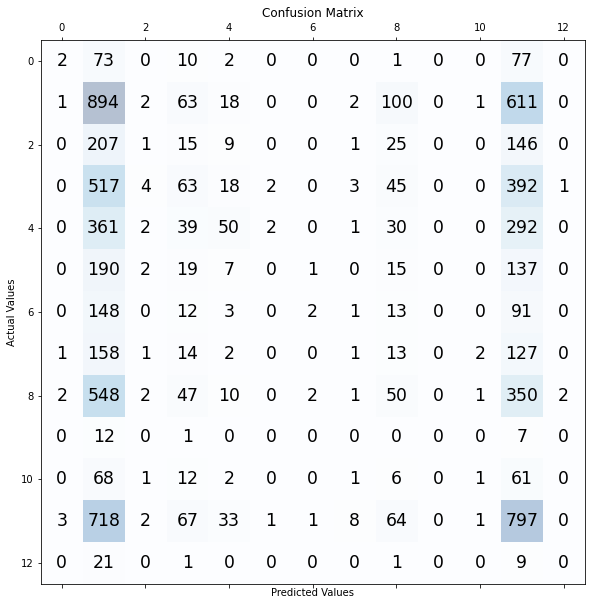

In [344]:
print(classification_report(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))
cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i, s = cm[i, j], va = 'center', ha = 'center', size = 'xx-large')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [345]:
index_to_classes

{0: 'empty',
 1: 'worry',
 2: 'surprise',
 3: 'happiness',
 4: 'love',
 5: 'fun',
 6: 'hate',
 7: 'relief',
 8: 'sadness',
 9: 'anger',
 10: 'enthusiasm',
 11: 'neutral',
 12: 'boredom'}